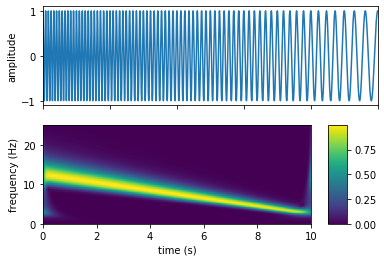

In [57]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from stockwell import st
from mpl_toolkits.mplot3d import axes3d

t = np.linspace(0, 10, 5001)
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')

fmin = 0  # Hz
fmax = 25  # Hz
df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(w, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, w)
ax[0].set(ylabel='amplitude')
aa = ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
fig.colorbar(aa, shrink=1, aspect=5);
plt.show()

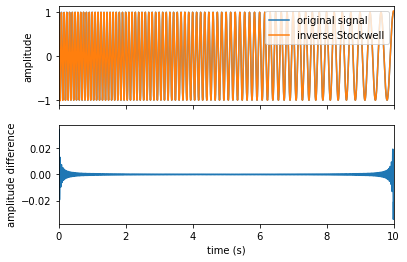

In [34]:
inv_stock = st.ist(stock, fmin_samples, fmax_samples)
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, w, label='original signal')
ax[0].plot(t, inv_stock, label='inverse Stockwell')
ax[0].set(ylabel='amplitude')
ax[0].legend(loc='upper right')
ax[1].plot(t, w - inv_stock)
ax[1].set_xlim(0, 10)
ax[1].set(xlabel='time (s)', ylabel='amplitude difference')
plt.show()

In [35]:
f = np.arange(fmin,fmax+df,df);

In [36]:
x,y = np.meshgrid(t,f);

In [39]:
z = np.abs(stock)

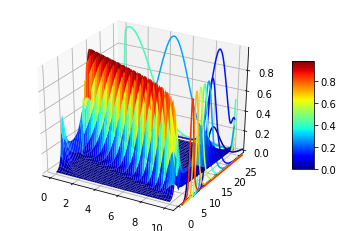

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z,cmap='jet');
fig.colorbar(surf, shrink=0.5, aspect=5);

ax.contour(x,y,z, zdir='x', offset=11, cmap='jet');
ax.contour(x,y,z, zdir='y', offset=26, cmap='jet');